## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np

## Importing the Dataset

In [2]:
df = pd.read_csv('Restaurant_Reviews.tsv', delimiter= '\t', quoting= 3)

## Reading the Dataset

In [3]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
df.shape

(1000, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


## Checking missing values

In [6]:
df.isnull().sum()/len(df)*100

Review    0.0
Liked     0.0
dtype: float64

## Checking duplicate values

In [7]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

## Cleaning the review column

In [8]:
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [9]:
corpus = []

for i in range(0, 1000):
    review = re.sub('[^A-Za-z]', ' ', df['Review'][i])
    review = review.lower()
    review = review.split()
    
    ps = PorterStemmer()
    
    stopword = stopwords.words('english')
    stopword.remove('not')
    
    review = ([ps.stem(word) for word in review if word not in set(stopword)])
    
    review = ' '.join(review)
    
    corpus.append(review)

In [10]:
print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

## Building Bag of Words model

### 1. Count Vectorizer Model

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features= 1500, min_df= 5)

X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, -1].values

In [12]:
vocab = cv.get_feature_names_out()
print(f' There are {len(vocab)} of vocabulary')

 There are 267 of vocabulary


## Train Test split

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 1)

In [14]:
X_train.shape

(800, 267)

In [15]:
X_test.shape

(200, 267)

In [16]:
y_train.shape

(800,)

In [17]:
y_test.shape

(200,)

## Building a model

### MultinomialNB Model

In [18]:
from sklearn.naive_bayes import MultinomialNB

In [19]:
nb = MultinomialNB()

nb.fit(X_train, y_train)

MultinomialNB()

In [20]:
y_pred = nb.predict(X_test)

In [21]:
from sklearn import metrics

nb_ar = metrics.accuracy_score(y_test, y_pred)
nb_ar

0.73

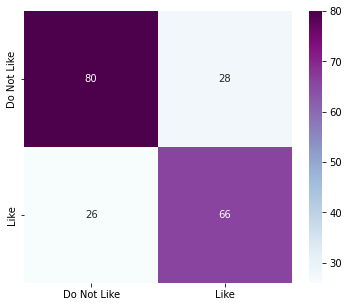

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize= (6,5))
sns.heatmap(cm, annot= True, cmap= 'BuPu', xticklabels= ['Do Not Like', 'Like'], yticklabels= ['Do Not Like', 'Like'])
plt.show()

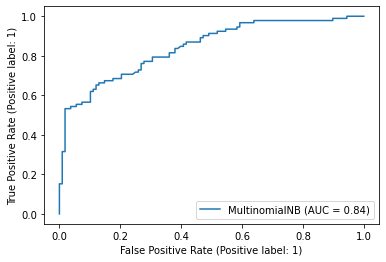

In [23]:
from sklearn.metrics import auc, roc_curve, RocCurveDisplay

display = RocCurveDisplay.from_estimator(nb, X_test, y_test, name= 'MultinomialNB')

In [24]:
from sklearn.metrics import classification_report

report= classification_report(y_test, y_pred, target_names= ['Do Not Like', 'Like'])
print(report)

              precision    recall  f1-score   support

 Do Not Like       0.75      0.74      0.75       108
        Like       0.70      0.72      0.71        92

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.73      0.73      0.73       200



## Comparing Multiple Models

### 1. GaussianNB Model

In [25]:
from sklearn.naive_bayes import GaussianNB

gb = GaussianNB()

gb.fit(X_train, y_train)

GaussianNB()

In [26]:
y_p = gb.predict(X_test)

In [27]:
gb_ar = metrics.accuracy_score(y_test, y_p)
gb_ar

0.685

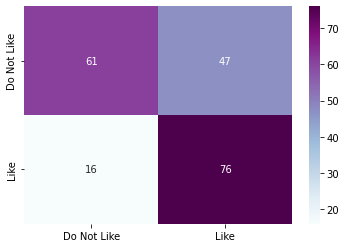

In [28]:
cm = metrics.confusion_matrix(y_test, y_p)

sns.heatmap(cm, annot= True, cmap= 'BuPu', xticklabels= ['Do Not Like', 'Like'], yticklabels= ['Do Not Like', 'Like'])
plt.show()

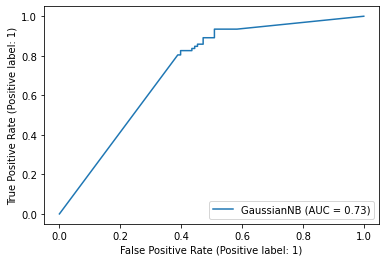

In [29]:
display = RocCurveDisplay.from_estimator(gb, X_test, y_test, name= 'GaussianNB')

In [30]:
reports = classification_report(y_test, y_p, target_names= ['Do Not Like', 'Like'])
print(reports)

              precision    recall  f1-score   support

 Do Not Like       0.79      0.56      0.66       108
        Like       0.62      0.83      0.71        92

    accuracy                           0.69       200
   macro avg       0.71      0.70      0.68       200
weighted avg       0.71      0.69      0.68       200



### 2. LogisticsRegression Model

In [31]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

LogisticRegression()

In [32]:
y_pred_class = lr.predict(X_test)

In [33]:
lr_ar = metrics.accuracy_score(y_test, y_pred_class)
lr_ar

0.78

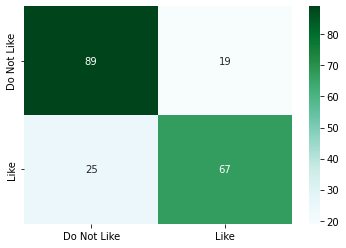

In [34]:
cm = metrics.confusion_matrix(y_test, y_pred_class)

sns.heatmap(cm, annot= True, cmap= 'BuGn', xticklabels= ['Do Not Like', 'Like'], yticklabels= ['Do Not Like', 'Like'])
plt.show()

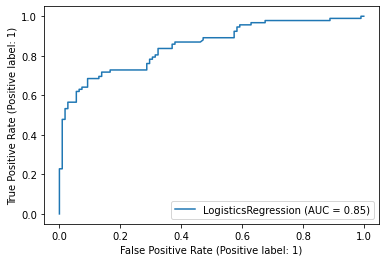

In [35]:
display = RocCurveDisplay.from_estimator(lr, X_test, y_test, name = 'LogisticsRegression')

In [36]:
report = classification_report(y_test, y_pred_class, target_names= ['Do Not Like', 'Like'])
print(report)

              precision    recall  f1-score   support

 Do Not Like       0.78      0.82      0.80       108
        Like       0.78      0.73      0.75        92

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200



### 3. Decision Tree Model

In [37]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_leaf_nodes= 5)

dt = decision_tree.fit(X_train, y_train)

In [38]:
y_pr = dt.predict(X_test)

In [39]:
dt_ar = metrics.accuracy_score(y_test, y_pr)
dt_ar

0.71

<AxesSubplot:>

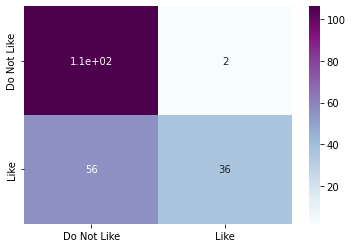

In [40]:
cm = metrics.confusion_matrix(y_test, y_pr)

sns.heatmap(cm, annot= True, cmap= 'BuPu', xticklabels= ['Do Not Like', 'Like'], yticklabels= ['Do Not Like', 'Like'])

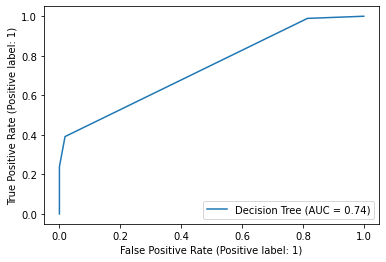

In [41]:
display = RocCurveDisplay.from_estimator(dt, X_test, y_test, name= 'Decision Tree')

In [42]:
report = classification_report(y_test, y_pr, target_names= ['Do Not Like', 'Like'])
print(report)

              precision    recall  f1-score   support

 Do Not Like       0.65      0.98      0.79       108
        Like       0.95      0.39      0.55        92

    accuracy                           0.71       200
   macro avg       0.80      0.69      0.67       200
weighted avg       0.79      0.71      0.68       200



### 4. Gradient Boosting

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [44]:
y_pe = gbc.predict(X_test)

In [45]:
gbc_ar = metrics.accuracy_score(y_test, y_pe)
gbc_ar

0.795

<AxesSubplot:>

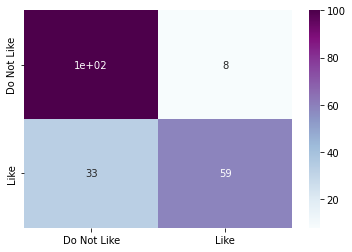

In [46]:
cm = metrics.confusion_matrix(y_test, y_pe)

sns.heatmap(cm, annot= True, cmap= 'BuPu', xticklabels= ['Do Not Like', 'Like'], yticklabels= ['Do Not Like', 'Like'])

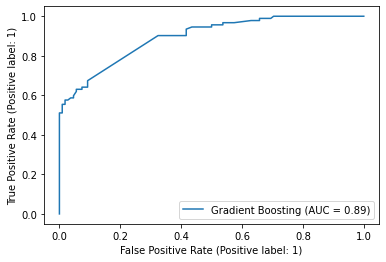

In [47]:
display = RocCurveDisplay.from_estimator(gbc, X_test, y_test, name= 'Gradient Boosting')

In [48]:
report = classification_report(y_test, y_pe, target_names= ['Do Not Like', 'Like'])
print(report)

              precision    recall  f1-score   support

 Do Not Like       0.75      0.93      0.83       108
        Like       0.88      0.64      0.74        92

    accuracy                           0.80       200
   macro avg       0.82      0.78      0.79       200
weighted avg       0.81      0.80      0.79       200



### 5. XGBoost Model

In [49]:
from xgboost import XGBClassifier

xg = XGBClassifier(learning_rate= 0.1, gamma= 3)

xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=3, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [50]:
y_pd = xg.predict(X_test)

In [51]:
xg_ar = metrics.accuracy_score(y_test, y_pd)
xg_ar

0.795

<AxesSubplot:>

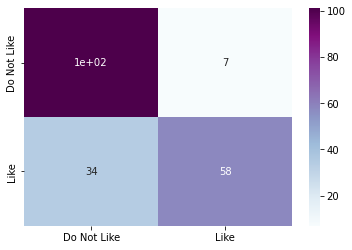

In [52]:
cm = metrics.confusion_matrix(y_test, y_pd)

sns.heatmap(cm, annot= True, cmap= 'BuPu', xticklabels= ['Do Not Like', 'Like'], yticklabels= ['Do Not Like', 'Like'])

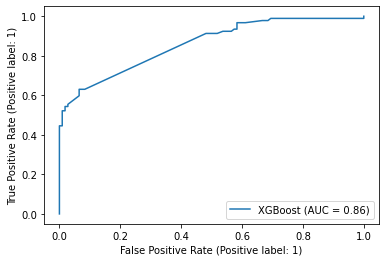

In [53]:
display = RocCurveDisplay.from_estimator(xg, X_test, y_test, name= 'XGBoost')

In [54]:
report = classification_report(y_test, y_pd, target_names= ['Do Not Like', 'Like'])
print(report)

              precision    recall  f1-score   support

 Do Not Like       0.75      0.94      0.83       108
        Like       0.89      0.63      0.74        92

    accuracy                           0.80       200
   macro avg       0.82      0.78      0.79       200
weighted avg       0.81      0.80      0.79       200



## Model Comparison

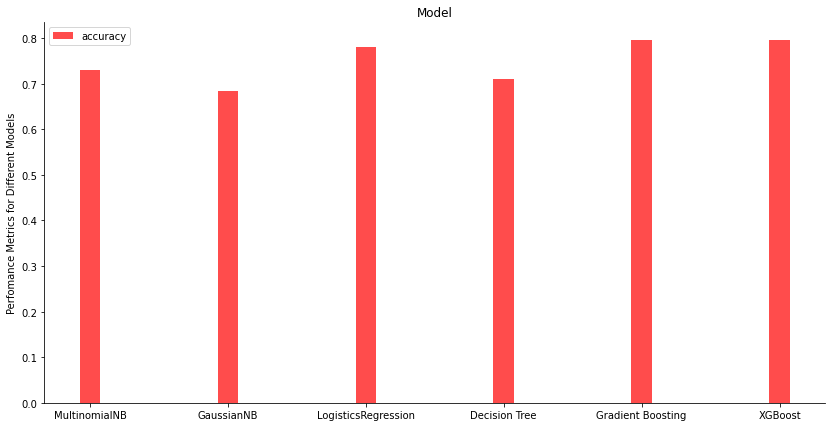

In [55]:
plt.figure(figsize= (14,7))
ax = plt.subplot(111)

models = ['MultinomialNB', 'GaussianNB', 'LogisticsRegression', 'Decision Tree', 'Gradient Boosting', 'XGBoost']

values = [nb_ar, gb_ar, lr_ar, dt_ar, gbc_ar, xg_ar]

model = np.arange(len(models))

plt.bar(model, values, align= 'center', width= 0.15, alpha= 0.7, color= 'red', label= 'accuracy')
plt.xticks(model, models)

plt.ylabel('Perfomance Metrics for Different Models')
plt.title('Model')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

plt.show()

## --------------------------------------------------------------------------------

## Building Bag of Words Model

### 2. TF-IDF Model

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

td = TfidfVectorizer()

td.fit(corpus)

TfidfVectorizer()

In [57]:
voc = td.get_feature_names()

print(f' There are {len(voc)} of vocabulary in TFIDF model')

 There are 1566 of vocabulary in TFIDF model


C:\Users\Sanchit\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [58]:
B_dtm = td.transform(corpus)

In [59]:
t = df.iloc[:,-1].values

In [60]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(B_dtm, t, test_size= 0.2, random_state= 1)

In [61]:
X_train_s.shape

(800, 1566)

In [62]:
X_test_s.shape

(200, 1566)

In [63]:
y_train_s.shape

(800,)

In [64]:
y_test_s.shape

(200,)

## Building a Model

###  Logistics Regression

In [65]:
lr_t = LogisticRegression()

lr_t.fit(X_train_s, y_train_s)

LogisticRegression()

In [66]:
y_send_class = lr_t.predict(X_test_s)

In [67]:
lr_t_as = metrics.accuracy_score(y_test_s, y_send_class)
lr_t_as

0.78

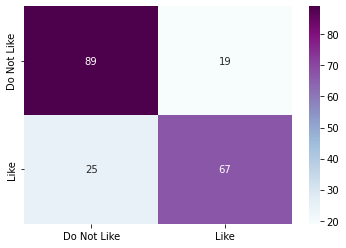

In [68]:
cm = metrics.confusion_matrix(y_test_s, y_send_class)

sns.heatmap(cm, annot= True, cmap= 'BuPu', xticklabels= ['Do Not Like', 'Like'], yticklabels= ['Do Not Like', 'Like'])
plt.show()

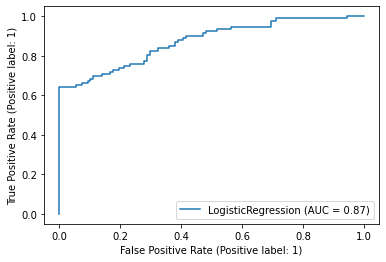

In [69]:
display = RocCurveDisplay.from_estimator(lr_t, X_test_s, y_test_s, name= 'LogisticRegression')

In [70]:
reports = classification_report(y_test_s, y_send_class, target_names= ['Do Not Like', 'Like'])
print(reports)

              precision    recall  f1-score   support

 Do Not Like       0.78      0.82      0.80       108
        Like       0.78      0.73      0.75        92

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200



### 3. Decision Tree Model

In [71]:
decision_tree_ = DecisionTreeClassifier(max_leaf_nodes= 4)

dt_t = decision_tree_.fit(X_train_s, y_train_s)

In [72]:
y_se = dt_t.predict(X_test_s)

In [73]:
dt_t_as = metrics.accuracy_score(y_test_s, y_se)
dt_t_as

0.69

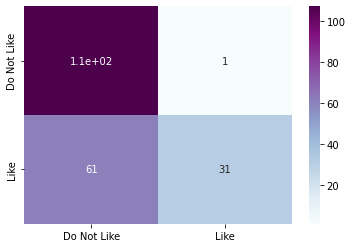

In [74]:
cm = metrics.confusion_matrix(y_test_s, y_se)

sns.heatmap(cm, annot= True, cmap= 'BuPu', xticklabels= ['Do Not Like', 'Like'], yticklabels= ['Do Not Like', 'Like'])
plt.show()

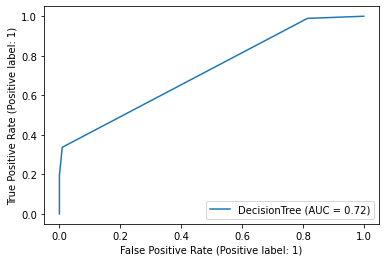

In [75]:
display = RocCurveDisplay.from_estimator(dt_t, X_test_s, y_test_s, name= 'DecisionTree')

In [76]:
report= classification_report(y_test_s, y_se, target_names= ['Do Not Like', 'Like'])
print(report)

              precision    recall  f1-score   support

 Do Not Like       0.64      0.99      0.78       108
        Like       0.97      0.34      0.50        92

    accuracy                           0.69       200
   macro avg       0.80      0.66      0.64       200
weighted avg       0.79      0.69      0.65       200



### 4. Gradient Boosting Model

In [77]:
gbc_t = GradientBoostingClassifier()

gbc_t.fit(X_train_s, y_train_s)

GradientBoostingClassifier()

In [78]:
y_sn = gbc_t.predict(X_test_s)

In [79]:
gbc_t_as = metrics.accuracy_score(y_test_s, y_sn)
gbc_t_as

0.81

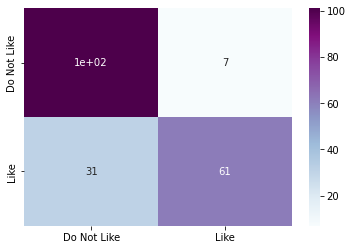

In [80]:
cm = metrics.confusion_matrix(y_test_s, y_sn)

sns.heatmap(cm, annot= True, cmap= 'BuPu', xticklabels= ['Do Not Like', 'Like'], yticklabels= ['Do Not Like', 'Like'])
plt.show()

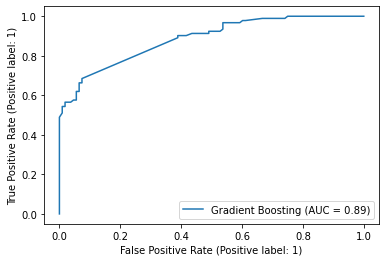

In [81]:
display = RocCurveDisplay.from_estimator(gbc_t, X_test_s, y_test_s, name= 'Gradient Boosting')

In [82]:
reports = classification_report(y_test_s, y_sn, target_names= ['Do Not Like', 'Like'])
print(reports)

              precision    recall  f1-score   support

 Do Not Like       0.77      0.94      0.84       108
        Like       0.90      0.66      0.76        92

    accuracy                           0.81       200
   macro avg       0.83      0.80      0.80       200
weighted avg       0.83      0.81      0.81       200



### 5. XGBoost Model

In [83]:
xg_t = XGBClassifier(learning_rate= 0.2, gamma= 4)

xg_t.fit(X_train_s, y_train_s)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=4, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [84]:
y_sd = xg_t.predict(X_test_s)

In [85]:
xg_t_as = metrics.accuracy_score(y_test_s, y_sd)
xg_t_as

0.775

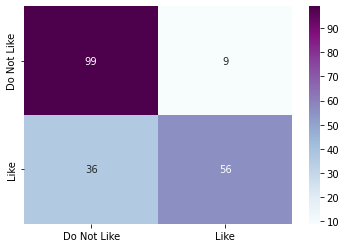

In [86]:
cm = metrics.confusion_matrix(y_test_s, y_sd)

sns.heatmap(cm, annot= True, cmap= 'BuPu', xticklabels= ['Do Not Like', 'Like'], yticklabels= ['Do Not Like', 'Like'])
plt.show()

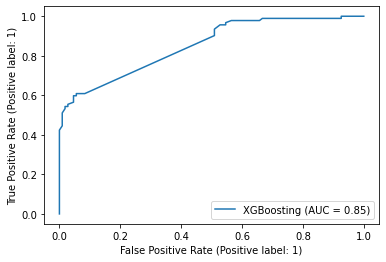

In [87]:
display = RocCurveDisplay.from_estimator(xg_t, X_test_s, y_test_s, name= 'XGBoosting')

In [88]:
reports = classification_report(y_test_s, y_sd, target_names= ['Do Not Like', 'Like'])
print(reports)

              precision    recall  f1-score   support

 Do Not Like       0.73      0.92      0.81       108
        Like       0.86      0.61      0.71        92

    accuracy                           0.78       200
   macro avg       0.80      0.76      0.76       200
weighted avg       0.79      0.78      0.77       200



### 6. Random Forest Model

In [91]:
from sklearn.ensemble import RandomForestClassifier

rf_t = RandomForestClassifier(n_estimators=10,random_state=10)

rf_t.fit(X_train_s,y_train_s)

RandomForestClassifier(n_estimators=10, random_state=10)

In [92]:
y_rd = rf_t.predict(X_test_s)

In [93]:
rf_t_as = metrics.accuracy_score(y_test_s, y_rd)
rf_t_as

0.775

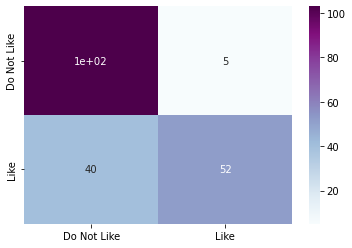

In [94]:
cm = metrics.confusion_matrix(y_test_s, y_rd)

sns.heatmap(cm, annot= True, cmap= 'BuPu', xticklabels= ['Do Not Like', 'Like'], yticklabels= ['Do Not Like', 'Like'])
plt.show()

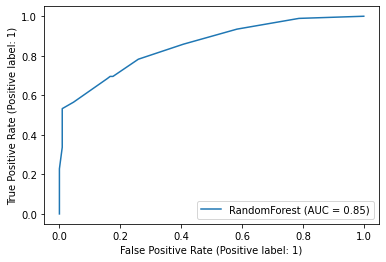

In [95]:
display = RocCurveDisplay.from_estimator(rf_t, X_test_s, y_test_s, name= 'RandomForest')

In [96]:
reports = classification_report(y_test_s, y_rd, target_names= ['Do Not Like', 'Like'])
print(reports)

              precision    recall  f1-score   support

 Do Not Like       0.72      0.95      0.82       108
        Like       0.91      0.57      0.70        92

    accuracy                           0.78       200
   macro avg       0.82      0.76      0.76       200
weighted avg       0.81      0.78      0.76       200



## Model Comparison after TFIDF

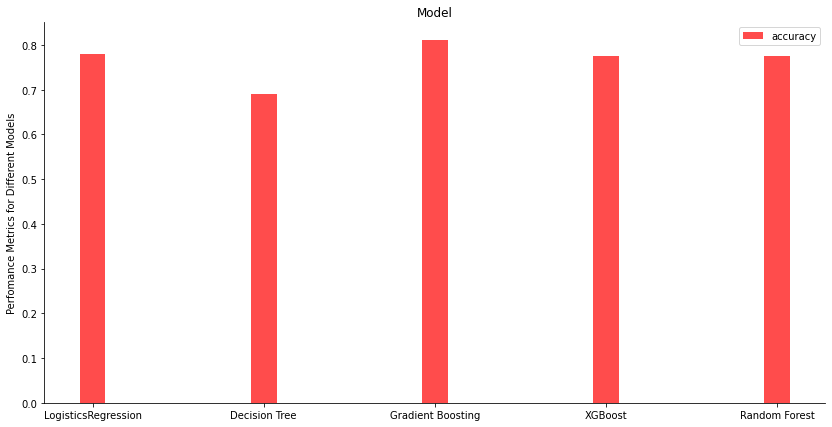

In [97]:
plt.figure(figsize= (14,7))
ax = plt.subplot(111)

models = ['LogisticsRegression', 'Decision Tree', 'Gradient Boosting', 'XGBoost', 'Random Forest']

values = [lr_t_as, dt_t_as, gbc_t_as, xg_t_as, rf_t_as]

model = np.arange(len(models))

plt.bar(model, values, align= 'center', width= 0.15, alpha= 0.7, color= 'red', label= 'accuracy')
plt.xticks(model, models)

plt.ylabel('Perfomance Metrics for Different Models')
plt.title('Model')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

plt.show()

## Sentiment Analysis

In [98]:
from textblob import TextBlob

In [99]:
sentiment_scores_tb = [round(TextBlob(article).sentiment.polarity, 3) for article in corpus]

In [100]:
sentiment_category_tb = ['positive' if score > 0
                              else 'negative' if score < 0
                                   else 'neutral'
                                        for score in sentiment_scores_tb]

In [101]:
df = pd.DataFrame([list(df['Review']), sentiment_scores_tb, sentiment_category_tb]).T
df.columns = ['Review', 'Sentiment_scores', 'Sentiment_category']
df['Sentiment_scores'] = df.Sentiment_scores.astype('float')

In [102]:
df.head()

,Review,Sentiment_scores,Sentiment_category
0,Wow... Loved this place.,0.30,positive
1,Crust is not good.,-0.35,negative
2,Not tasty and the texture was just nasty.,0.00,neutral
3,Stopped by during the late May bank holiday of...,0.10,positive
4,The selection on the menu was great and so wer...,0.80,positive
